Since the classification is either racist/non-racist , it is a binary classification problem.
Reading the train and test datasets.

In [1]:
import numpy as np
import pandas as pd

train_df = pd.read_csv("/Raju/Twitter Sentiment Analysis/train_tweets.csv")
test_df = pd.read_csv("/Raju/Twitter Sentiment Analysis/test_tweets.csv")

train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


Inspection of Data

Lets check out some non racist tweets.

In [2]:
train_df[train_df['label'] == 0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


Lets check out some non racist tweets.

In [3]:
train_df[train_df['label'] == 1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


Checking the data we see that ,There are lots of unnecessary words and characters which does not add any value to our analysis
So we will try to remove these in our data cleaning process.

Lets check the shape of train and test datasets.

In [4]:
train_df.shape, test_df.shape

((31962, 3), (17197, 2))

So train set is lamost the double of test set

Lets visualize the distribution of racist and non racist tweets in our train dataset

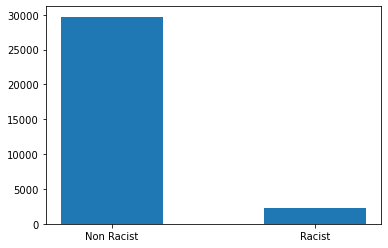

In [5]:
import matplotlib.pyplot as plt
x=['Non Racist','Racist']
plt.bar(x,train_df["label"].value_counts(),width = 0.5)
plt.show()

We can see that the tweets in the train datasets are skewed towars Non Racist tweets, there are very less racist tweets.
So it is imbalanced classification problem.

Now lets check the distribution of tweets in terms of length of tweet in both train and test sets

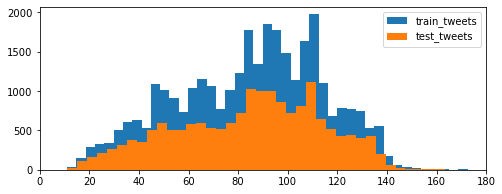

In [6]:
train_length = train_df['tweet'].str.len()
test_length = test_df['tweet'].str.len()
plt.figure(figsize = (8,3))
plt.hist(train_length,bins = 70, label = "train_tweets")
plt.hist(test_length,bins = 70, label = "test_tweets")
plt.xlim(0,180)
plt.legend()
plt.show()

We can see that tweets are proportionally distributed in test and trains sets

Now lets clean the data since there are lots of noise in the data

In [7]:
import re

def remove_pattern(input_text,pattern):
    r = re.findall(pattern,input_text)
    for i in r:
        input_text = re.sub(i,'',input_text)
        
    return input_text

The above function is used to remove the pattens that are matched in the tweet

Removing user names from the tweet as it does not add any significant value in sentimet analysis

In [8]:
train_df['clean_tweet'] = np.vectorize(remove_pattern)(train_df['tweet'],'@\w*')
#test_df['clean_tweet'] = np.vectorize(remove_pattern)(test_df['tweet'],'@\w*')
train_df.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


Now lets remove punctuations numbers and special characters from the tweets


In [9]:
train_df['clean_tweet'] = train_df['clean_tweet'].str.replace('[^a-zA-z]',' ')
#test_df['clean_tweet'] = test_df['clean_tweet'].str.replace('[^a-zA-z]',' ')
train_df.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[ ] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so gr


In [10]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

def remove_stopwords(input_text,stopwords):
    filtered_sentence = ""
    word_tokens = word_tokenize(input_text)
    for w in word_tokens:
        if w not in stop_words: 
            filtered_sentence =  filtered_sentence +" " + w
        
    return filtered_sentence

In [11]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 
train_df['clean_tweet'] = np.vectorize(remove_stopwords)(train_df['clean_tweet'],stopwords)
#test_df['clean_tweet'] = np.vectorize(remove_stopwords)(test_df['clean_tweet'],stopwords)

In [12]:
train_df.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfu...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[ ] huge fan fare big talking leave chaos pay...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,next school year year exams think school exam...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cavs champions cleveland clev...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome gr


In [13]:
train_df['clean_tweet'] = train_df['clean_tweet'].apply(lambda x : ' '.join([w for w in x.split() if len(w) > 3]))
#test_df['clean_tweet'] = test_df['clean_tweet'].apply(lambda x : ' '.join([w for w in x.split() if len(w) > 3]))
train_df.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cause offer wheelchair vans...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love take time
4,5,0,factsguide: society now #motivation,factsguide society motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fare talking leave chaos disputes allshow...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,next school year year exams think school exams...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cavs champions cleveland cleve...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome


In [14]:
tokenized_tweet = train_df['clean_tweet'].apply(lambda x: x.split())
#tokenized_tweet_test = test_df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, lyft, credit, cause, offer, wheelchai...
2                                    [bihday, majesty]
3                            [model, love, take, time]
4                    [factsguide, society, motivation]
Name: clean_tweet, dtype: object

In [15]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x : [lemmatizer.lemmatize(i) for i in x])
#tokenized_tweet_test = tokenized_tweet_test.apply(lambda x : [lemmatizer.lemmatize(i) for i in x])


In [16]:
tokenized_tweet.head(10)


0    [father, dysfunctional, selfish, drag, kid, dy...
1    [thanks, lyft, credit, cause, offer, wheelchai...
2                                    [bihday, majesty]
3                            [model, love, take, time]
4                    [factsguide, society, motivation]
5    [huge, fare, talking, leave, chaos, dispute, a...
6                           [camping, tomorrow, danny]
7    [next, school, year, year, exam, think, school...
8    [love, land, allin, cavs, champion, cleveland,...
9                                            [welcome]
Name: clean_tweet, dtype: object

In [17]:

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
train_df['clean_tweet'] = tokenized_tweet


#for i in range(len(tokenized_tweet_test)):
 #   tokenized_tweet_test[i] = ' '.join(tokenized_tweet_test[i])
  #  
#test_df['clean_tweet'] = tokenized_tweet_test

In [18]:
train_df.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunction
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cause offer wheelchair van ...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love take time
4,5,0,factsguide: society now #motivation,factsguide society motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fare talking leave chaos dispute allshowa...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,next school year year exam think school exam h...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cavs champion cleveland clevel...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome


In [19]:
all_words = ' '.join(text for text in train_df['clean_tweet'])

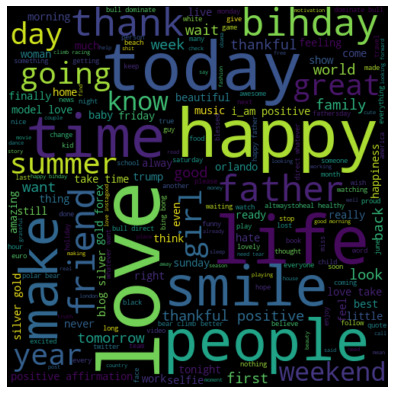

In [20]:
from wordcloud import WordCloud
wordcloud = WordCloud(height = 500,width = 500,random_state = 20,max_font_size = 110).generate(all_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

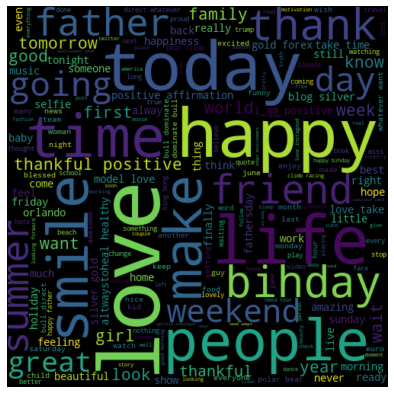

In [21]:
normal_words = ' '.join([text for text in train_df['clean_tweet'][train_df['label'] == 0]])
wordcloud = WordCloud(height = 500,width = 500,random_state = 20,max_font_size = 110).generate(normal_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

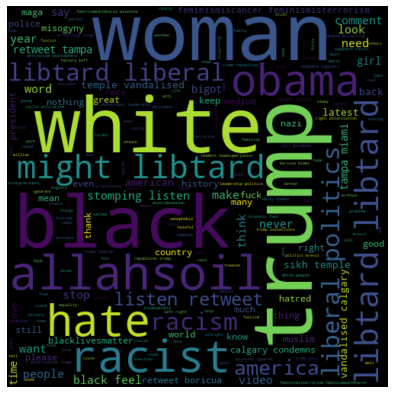

In [22]:
racist_words = ' '.join([text for text in train_df['clean_tweet'][train_df['label'] == 1]])
wordcloud = WordCloud(height = 500,width = 500,random_state = 20,max_font_size = 110).generate(racist_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer =TfidfVectorizer(max_df =0.8,min_df = 10,max_features = 1000)
tfidf = tfidf_vectorizer.fit_transform(train_df['clean_tweet'])
#tfidf_test = tfidf_vectorizer.fit_transform(test_df['clean_tweet'])
tfidf.shape

(31962, 1000)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

x_train,x_test,y_train,y_test = train_test_split(tfidf,train_df['label'],test_size = 0.20,random_state = 42)

lreg = LogisticRegression()

lreg.fit(x_train,y_train)


LogisticRegression()

In [25]:
predict = lreg.predict_proba(x_test)
prediction_int = predict[:,1] >= 0.3
prediction_int  = prediction_int.astype(np.int)
f1_score(y_test,prediction_int)


0.5544041450777202